Presenta información agregada utilizando funciones de agrupación,
agregación y pivoteo para el análisis de un set de datos

Para este ejercicio, primero debe obtener los datos de gapminder de la URL
de carpintería de software y cargarlos como marco de datos de pandas. Los
datos de gapminder tienen información sobre la vida útil, la población y el pib
de los países durante varios años.

In [1]:
#imports and dataset
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df = pd.read_csv('gapminder-FiveYearData.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


1. Realice un resumen estadístico de sus datos.

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.loc[ : , df.columns!='year'].describe().T

,count,mean,std,min,25%,50%,75%,max
pop,1704.00,29601212.33,106157896.75,60011.00,2793664.00,7023595.50,19585221.75,1318683096.00
lifeExp,1704.00,59.47,12.92,23.60,48.20,60.71,70.85,82.60
gdpPercap,1704.00,7215.33,9857.45,241.17,1202.06,3531.85,9325.46,113523.13


2. Agrupe por la variable “año”. Comente respecto al resultado al usar
groupby.
3. Ahora obtenga la suma (la cantidad), la media y la mediana para cada
grupo, es decir, por año.

In [3]:
agrupado_year_df = df.groupby(['year'])
analisis = agrupado_year_df.aggregate({'pop':['count','mean', 'median'],'lifeExp':['count', 'mean', 'median'], 'gdpPercap':['count','mean', 'median']})
analisis

pop                         lifeExp              gdpPercap            
     count        mean      median   count  mean median     count     mean   
year                                                                         
1952   142 16950402.47  3943953.00     142 49.06  45.14       142  3725.28  \
1957   142 18763412.54  4282942.00     142 51.51  48.36       142  4299.41   
1962   142 20421006.86  4686039.50     142 53.61  50.88       142  4725.81   
1967   142 22658298.48  5170175.50     142 55.68  53.83       142  5483.65   
1972   142 25189979.99  5877996.50     142 57.65  56.53       142  6770.08   
1977   142 27676378.92  6404036.50     142 59.57  59.67       142  7313.17   
1982   142 30207301.69  7007320.00     142 61.53  62.44       142  7518.90   
1987   142 33038573.37  7774861.50     142 63.21  65.83       142  7900.92   
1992   142 35990917.32  8688686.50     142 64.16  67.70       142  8158.61   
1997   142 38839468.11  9735063.50     142 65.01  69.39       142  9090.18   
2002   142 41457588.58 10372918.50     142 65.69  70.83       142  9917.85   
2007   142 44021219.57 10517531.00     142 67.01  71.94       142 11680.07   

              
      median  
year          
1952 1968.53  
1957 2173.22  
1962 2335.44  
1967 2678.33  
1972 3339.13  
1977 3798.61  
1982 4216.23  
1987 4280.30  
1992 4386.09  
1997 4781.83  
2002 5319.80  
2007 6124.37

In [4]:
grupo_57 = agrupado_year_df.get_group(1967)
grupo_57

,country,year,pop,continent,lifeExp,gdpPercap
3,Afghanistan,1967,11537966.00,Asia,34.02,836.20
15,Albania,1967,1984060.00,Europe,66.22,2760.20
27,Algeria,1967,12760499.00,Africa,51.41,3246.99
39,Angola,1967,5247469.00,Africa,35.98,5522.78
51,Argentina,1967,22934225.00,Americas,65.63,8052.95
...,...,...,...,...,...,...
1647,Vietnam,1967,39463910.00,Asia,47.84,637.12
1659,West Bank and Gaza,1967,1142636.00,Asia,51.63,2649.72
1671,Yemen Rep.,1967,6740785.00,Asia,36.98,862.44
1683,Zambia,1967,3900000.00,Africa,47.77,1777.08


In [5]:
grupo_57.groupby('continent').aggregate({'pop':['mean', 'median'],'lifeExp':['mean', 'median'], 'gdpPercap':['mean', 'median']})

pop             lifeExp        gdpPercap         
                 mean      median    mean median      mean   median
continent                                                          
Africa     6447874.79  3473692.50   45.33  44.70   2050.36  1210.38
Americas  19229864.92  4318137.00   60.41  60.52   5668.25  4643.39
Asia      57747360.61 11261690.00   54.66  53.66   5971.17  2029.23
Europe    16039298.60  8140724.00   69.74  70.61  10143.82  9366.07
Oceania    7300207.00  7300207.00   71.31  71.31  14495.02 14495.02

Es interesante comparar estos valores en los diferentes continentes, llama la atencion el nivel de diferencia entre africa con los demas continentes en todas las variables
mas importante aun en su expectativa de vida es casi la mitad de oceania, a pesar que su poblacion es aun menor que la de esta ultima pero todo tiene que ver con su gdp que es 11 veces el de este, tambien lo parecidos en nivel de deesarrollo entre europa y asia tambien llaman la atencion pense que habria mas diferencia a pesar que fue en los 60s. Bueno esto en gran parte por que china en ese momento era de gran manera agropecuario ademas que tan solo pocos años antes se habia llevado a cabo el gran salto adelante de Mao

In [6]:
grupo_07 = agrupado_year_df.get_group(2007)
grupo_07.groupby('continent').aggregate({'pop':['mean', 'median'],'lifeExp':['mean', 'median'], 'gdpPercap':['mean', 'median']})

pop             lifeExp        gdpPercap         
                  mean      median    mean median      mean   median
continent                                                           
Africa     17875763.31 10093310.50   54.81  52.93   3089.03  1452.27
Americas   35954847.36  9319622.00   73.61  72.90  11003.03  8948.10
Asia      115513752.33 24821286.00   70.73  72.40  12473.03  4471.06
Europe     19536617.63  9493598.00   77.65  78.61  25054.48 28054.07
Oceania    12274973.50 12274973.50   80.72  80.72  29810.19 29810.19

40 años es un periodo interesante para ver a grandes razgos los cambios. Asia duplico su gdp y naturalmente este desarrollo aumento su expectativa de vida, y eso que aun no habia sucedido el gran cambio economico que esta viviendo actualmente. Llama la atenbcion que africa apenas tuvo crecimiento pero siempre ha sido historicamente un continente conflictivo que no le ha permitido crecer como los demas.

In [7]:
no_country_df = df.drop(['country'],axis=1)
pivot_continent = pd.pivot_table(data=no_country_df, index=['continent'])
pivot_continent

,gdpPercap,lifeExp,pop,year
continent,,,,
Africa,2193.75,48.87,9916003.14,1979.50
Americas,7136.11,64.66,24504795.00,1979.50
Asia,7902.15,60.06,77038721.97,1979.50
Europe,14469.48,71.90,17169764.73,1979.50
Oceania,18621.61,74.33,8874672.33,1979.50


In [8]:
pivot_continent_year = pd.pivot_table(data=no_country_df, index=['continent', 'year'], values=['pop'])
pivot_continent_year

pop
continent year             
Africa    1952   4570009.63
          1957   5093033.42
          1962   5702247.40
          1967   6447874.79
          1972   7305375.79
          1977   8328096.56
          1982   9602857.44
          1987  11054502.12
          1992  12674644.56
          1997  14304480.46
          2002  16033152.23
          2007  17875763.31
Americas  1952  13806097.84
          1957  15478156.64
          1962  17330810.16
          1967  19229864.92
          1972  21175368.40
          1977  23122707.96
          1982  25211636.80
          1987  27310158.84
          1992  29570964.16
          1997  31876016.40
          2002  33990910.48
          2007  35954847.36
Asia      1952  42283556.12
          1957  47356987.85
          1962  51404763.09
          1967  57747360.61
          1972  65180977.21
          1977  72257986.55
          1982  79095017.64
          1987  87006689.76
          1992  94948248.21
          1997 102523803.03
          2002 109145521.30
          2007 115513752.33
Europe    1952  13937361.53
          1957  14596345.03
          1962  15345171.83
          1967  16039298.60
          1972  16687835.30
          1977  17238817.70
          1982  17708896.70
          1987  18103138.67
          1992  18604759.90
          1997  18964804.93
          2002  19274128.97
          2007  19536617.63
Oceania   1952   5343003.00
          1957   5970988.00
          1962   6641759.00
          1967   7300207.00
          1972   8053050.00
          1977   8619500.00
          1982   9197425.00
          1987   9787207.50
          1992  10459825.50
          1997  11120715.00
          2002  11727414.50
          2007  12274973.50

In [10]:
pivot_continent_year.mean()

pop   27500791.44
dtype: float64

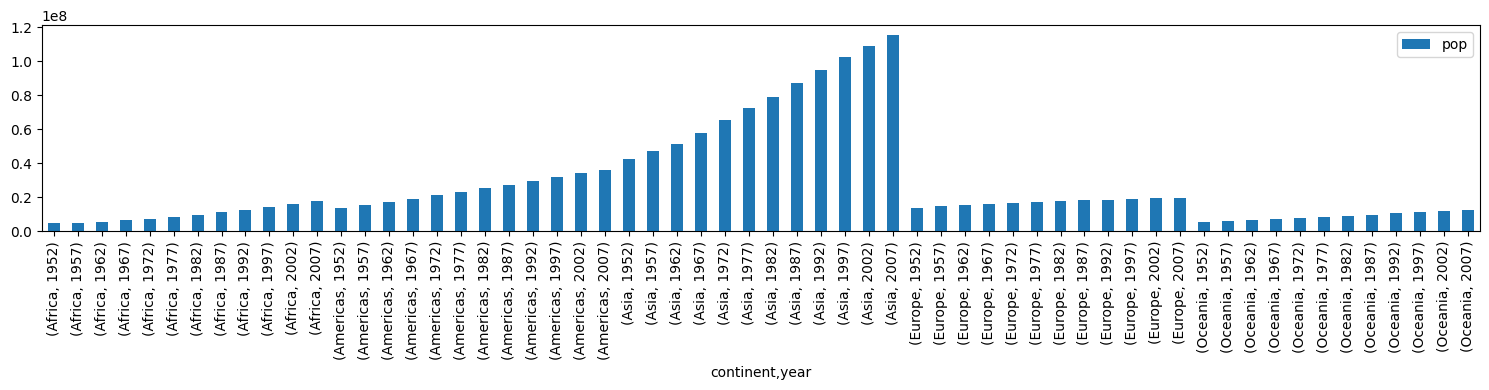

In [9]:
pivot_continent_year.plot(kind='bar');

Se observa como ha evolucionado la poblacion de asia de gran manera comparado con los otros continentes, llama la atencion que europa apenas ha cambiado en comparacion o los otros continentes.